<a href="https://colab.research.google.com/github/Vipin-1985/covid-data-analysis-of-India/blob/main/covid19_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#parse_dates=["Date"])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df=pd.read_csv("C:\\Users\\akhil\\OneDrive\\Desktop\\ddu\\dataset\\covid_19_world.csv",parse_dates=["Date"])
df    #By default, date columns are represented as object when loading data from a CSV file. To read the date column correctly, we can use the argument parse_dates to specify a list of date columns

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
df.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat",
                  "Long":"long","Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered"},inplace=True)

In [ ]:
df.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'deaths',
       'recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
df["active"]=df["confirmed"]-df["deaths"]-df["recovered"]

In [ ]:
df.iloc[9:12,:] #  display only specified rows

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific,0
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific,0
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific,0


In [ ]:
top=df[df["date"]==df["date"].max()] # retrieve last date info

In [ ]:
top

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
44892,NaN,Afghanistan,33.939110,67.709953,2020-12-07,34451,1010,21216,12225,Eastern Mediterranean,12225
44893,NaN,Albania,41.153300,20.168300,2020-12-07,3454,93,1946,1415,Europe,1415
44894,NaN,Algeria,28.033900,1.659600,2020-12-07,19195,1011,13743,4441,Africa,4441
44895,NaN,Andorra,42.506300,1.521800,2020-12-07,855,52,803,0,Europe,0
44896,NaN,Angola,-11.202700,17.873900,2020-12-07,506,26,118,362,Africa,362
...,...,...,...,...,...,...,...,...,...,...,...
45148,NaN,Sao Tome and Principe,0.186400,6.613100,2020-12-07,729,14,286,429,Africa,429
45149,NaN,Yemen,15.552727,48.516388,2020-12-07,1465,417,659,389,Eastern Mediterranean,389
45150,NaN,Comoros,-11.645500,43.333300,2020-12-07,317,7,296,14,Africa,14
45151,NaN,Tajikistan,38.861000,71.276100,2020-12-07,6552,55,5228,1269,Europe,1269


In [ ]:
top.tail()

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
45148,NaN,Sao Tome and Principe,0.186400,6.613100,2020-12-07,729,14,286,429,Africa,429
45149,NaN,Yemen,15.552727,48.516388,2020-12-07,1465,417,659,389,Eastern Mediterranean,389
45150,NaN,Comoros,-11.645500,43.333300,2020-12-07,317,7,296,14,Africa,14
45151,NaN,Tajikistan,38.861000,71.276100,2020-12-07,6552,55,5228,1269,Europe,1269
45152,NaN,Lesotho,-29.610000,28.233600,2020-12-07,233,2,32,199,Africa,199


In [ ]:
world=top.groupby("country")["confirmed","active","deaths","date"].sum().reset_index()

In [ ]:
world

,country,confirmed,active,deaths
0,Afghanistan,34451,12225,1010
1,Albania,3454,1415,93
2,Algeria,19195,4441,1011
3,Andorra,855,0,52
4,Angola,506,362,26
...,...,...,...,...
182,West Bank and Gaza,6230,5252,36
183,Western Sahara,10,1,1
184,Yemen,1465,389,417
185,Zambia,1895,441,42


In [ ]:
world.head(67)


,country,confirmed,active,deaths
0,Afghanistan,34451,12225,1010
1,Albania,3454,1415,93
2,Algeria,19195,4441,1011
3,Andorra,855,0,52
4,Angola,506,362,26
...,...,...,...,...
62,Gabon,5942,2892,46
63,Gambia,64,27,3
64,Georgia,986,114,15
65,Germany,199919,6434,9071


In [ ]:
#determining total confirmed cases grouped by date
total_cases=df.groupby("date")["date","confirmed"].sum().reset_index()
total_cases

,date,confirmed
0,2020-01-02,12038
1,2020-01-03,87690
2,2020-01-04,947569
3,2020-01-05,3355922
4,2020-01-06,6280725
...,...,...
183,2020-12-03,131603
184,2020-12-04,1845653
185,2020-12-05,4263867
186,2020-12-06,7654725


[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

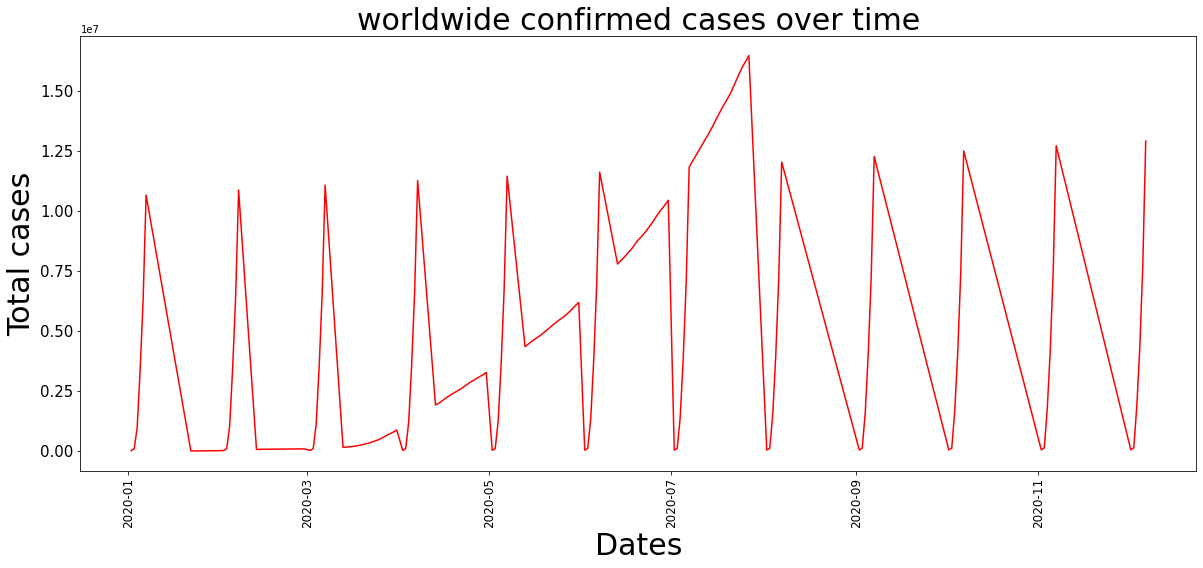

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("total cases",fontsize=30)
plt.title("worldwide confirmed cases over time",fontsize=30)

ax=sns.lineplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color="r")
ax.set(xlabel="Dates",ylabel="Total cases")

In [ ]:
#current top countries having most active cases
top_actives=top.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,US,2163411
1,Brazil,527738
2,India,301609
3,United Kingdom,244872
4,Russia,214510
5,South Africa,137289
6,Canada,100507
7,France,99495
8,Peru,97345
9,Bangladesh,87829


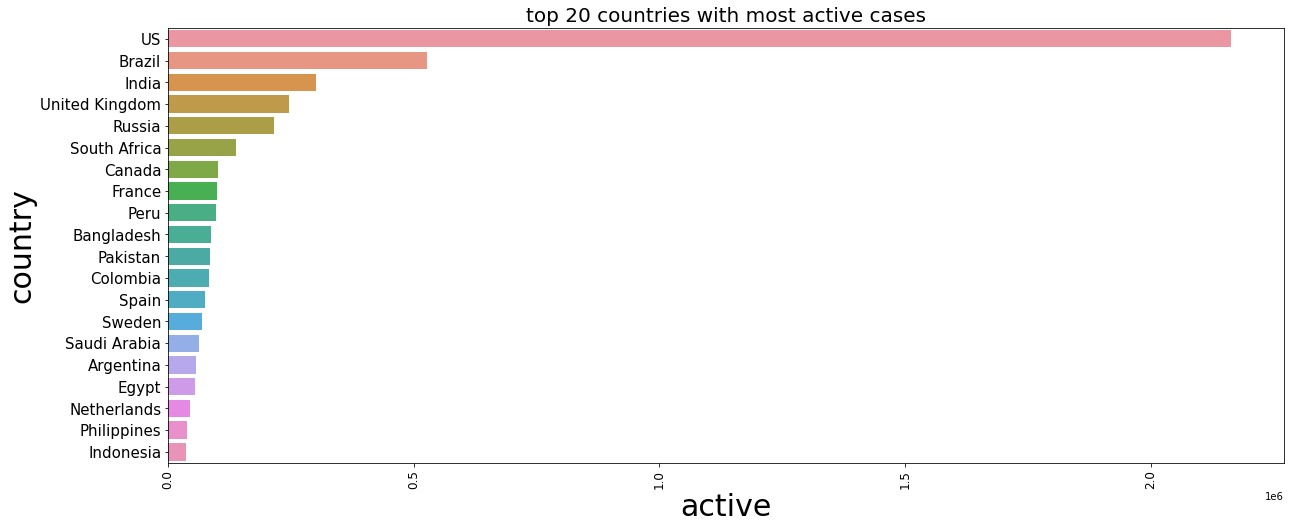

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("active",fontsize=30)
plt.ylabel("country",fontsize=30)
plt.title("top 20 countries with most active cases",fontsize=20)

ax=sns.barplot(x=top_actives.active,y=top_actives.country)


In [ ]:
#Extract data of italy,us,china.India
china=df[df.country=="China"]
china

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific,1
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific,14
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific,6
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific,1
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific,0
...,...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific,6
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific,0
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific,235
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific,2


In [ ]:
china=china.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
china

,date,recovered,deaths,confirmed,active
0,2020-01-02,272,259,11891,11360
1,2020-01-03,40670,2872,79932,36390
2,2020-01-04,74844,3316,82361,4201
3,2020-01-05,77001,4637,83959,2321
4,2020-01-06,77822,4638,84154,1694
...,...,...,...,...,...
183,2020-12-03,61344,3172,80932,16416
184,2020-12-04,76390,3343,83134,3401
185,2020-12-05,77647,4637,84018,1734
186,2020-12-06,77896,4638,84228,1694


In [ ]:
#data of US
us=df[df.country=="US"]
us

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas,1
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas,1
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas,2
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas,2
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas,5
...,...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas,2661117
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas,2705347
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas,2753091
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas,2789125


In [ ]:
us=us.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us

,date,recovered,deaths,confirmed,active
0,2020-01-02,0,0,8,8
1,2020-01-03,7,1,30,22
2,2020-01-04,8474,6846,214205,198885
3,2020-01-05,164015,66125,1106829,876689
4,2020-01-06,458231,106136,1816479,1252112
...,...,...,...,...,...
183,2020-12-03,12,43,1561,1506
184,2020-12-04,32988,26548,556522,496986
185,2020-12-05,230287,83483,1375152,1061382
186,2020-12-06,547386,115334,2048986,1386266


In [ ]:
us=us.iloc[33:].reset_index().drop("index",axis=1)
us

,date,recovered,deaths,confirmed,active
0,2020-02-24,5,0,15,10
1,2020-02-25,6,0,15,9
2,2020-02-26,6,0,15,9
3,2020-02-27,6,0,16,10
4,2020-02-28,7,0,16,9
...,...,...,...,...,...
150,2020-12-03,12,43,1561,1506
151,2020-12-04,32988,26548,556522,496986
152,2020-12-05,230287,83483,1375152,1061382
153,2020-12-06,547386,115334,2048986,1386266


In [ ]:
us.iloc[25:]

,date,recovered,deaths,confirmed,active
25,2020-03-26,681,1746,84091,81664
26,2020-03-27,869,2300,102276,99107
27,2020-03-28,1072,2934,122069,118063
28,2020-03-29,2665,3561,141205,134979
29,2020-03-30,5644,4381,162707,152682
...,...,...,...,...,...
150,2020-12-03,12,43,1561,1506
151,2020-12-04,32988,26548,556522,496986
152,2020-12-05,230287,83483,1375152,1061382
153,2020-12-06,547386,115334,2048986,1386266


In [ ]:
#data for italy
italy=df[df.country=="Italy"]
italy=italy.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop("index",axis=1)
italy


,date,recovered,deaths,confirmed,active
0,2020-01-25,0,0,0,0
1,2020-01-26,0,0,0,0
2,2020-01-27,0,0,0,0
3,2020-01-28,0,0,0,0
4,2020-01-29,0,0,0,0
...,...,...,...,...,...
174,2020-12-03,1045,1016,15113,13052
175,2020-12-04,34211,19899,156363,102253
176,2020-12-05,109039,30911,221216,81266
177,2020-12-06,173085,34223,236305,28997


In [ ]:
#data for India

india=df[df.country=="India"]
india=india.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india=india.iloc[8:].reset_index().drop("index",axis=1)
india

,date,recovered,deaths,confirmed,active
0,2020-01-24,0,0,0,0
1,2020-01-25,0,0,0,0
2,2020-01-26,0,0,0,0
3,2020-01-27,0,0,0,0
4,2020-01-28,0,0,0,0
...,...,...,...,...,...
175,2020-12-03,4,1,73,68
176,2020-12-04,1080,331,9205,7794
177,2020-12-05,24420,2415,74292,47457
178,2020-12-06,154330,8884,308993,145779


In [ ]:
india.tail()

,date,recovered,deaths,confirmed,active
175,2020-12-03,4,1,73,68
176,2020-12-04,1080,331,9205,7794
177,2020-12-05,24420,2415,74292,47457
178,2020-12-06,154330,8884,308993,145779
179,2020-12-07,553471,23174,878254,301609


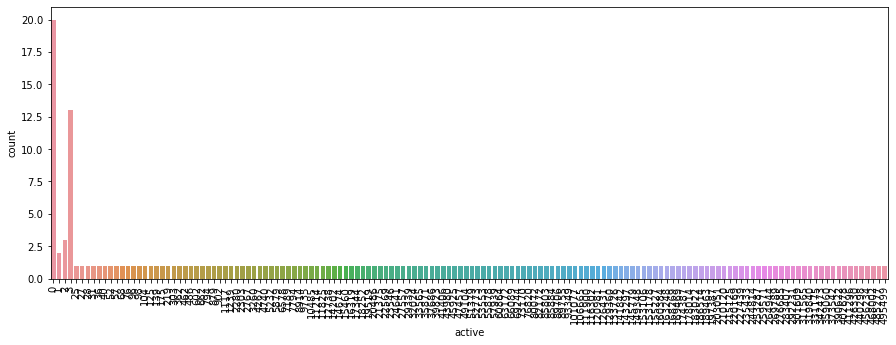

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(india.active)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# Detailed Analysis Of covid cases in India¶

In [ ]:
df_india=pd.read_csv("C:\\Users\\akhil\\OneDrive\\Desktop\\ddu\\dataset\\covid_19_india.csv")

In [ ]:
df_india

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
3346,3347,22-06-2020,8:00 AM,Tripura,-,-,782,1,1237
3347,3348,22-06-2020,8:00 AM,Uttarakhand,-,-,1521,28,2402
3348,3349,22-06-2020,8:00 AM,Uttar Pradesh,-,-,11601,569,18322
3349,3350,22-06-2020,8:00 AM,West Bengal,-,-,8687,569,14358
